In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:


N = 200# number of cavity fock states
psi0 = tensor(coherent(N,0), basis(2,1))
w = 10 * 2 * np.pi  # cavity frequency
tlist = np.linspace(0,2*6*np.pi/w,1001)
def cal_excited_probability(w0):
      
    n_th_a = 2        # avg number of thermal bath excitation

    
    g  = 2*w  # coupling strength    
    # intial state
    psi0 = tensor(coherent(N,0), basis(2,1))
        # start with an excited atom
    
    # operators
    a  = tensor(destroy(N), qeye(2))
    sz = tensor(qeye(N), sigmaz())
    sm = tensor(qeye(N), destroy(2))
    b = tensor(qeye(N), sigmax())*a
#     Parity = tensor((-1)**(create(N)*destroy(N)), sigmaz())
    # Hamiltonian
#     H = w * a.dag() * a + w0*sz/2 + g * (a.dag()+ a)*(sm.dag()+sm)
    H = w * a.dag() * a + w0*sz/2 + g * (a.dag()+ a)*(sm.dag()+sm)
    output = mesolve(H, psi0, tlist,e_ops=[b.dag()*b,b.dag()*b*b.dag()*b],options = Options(store_states=True))
    fidelity_list = []
    for state in output.states:
        fidelity_list.append(fidelity(psi0,state))
    return fidelity_list,output.expect[0],output.expect[1]

In [9]:
fidelity_list1,nb1_expect,nb1_sqr_expect= cal_excited_probability(0.5*w)
fidelity_list2,nb2_expect,nb2_sqr_expect = cal_excited_probability(0*w)
nbvar = np.sqrt((nb1_sqr_expect-nb1_expect**2))

(0.0, 1.0)

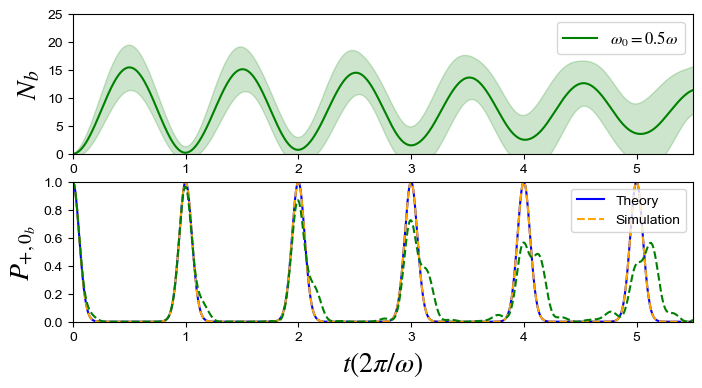

In [13]:
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(8,4))

ax1.plot(tlist/(2*np.pi/w),nb1_expect,color="green",label=r"$\omega_0 = 0.5\omega$")
# ax1.plot(tlist/(2*np.pi/w),nb2,color="green",alpha=0.5)
ax1.fill_between(tlist/(2*np.pi/w), nb1_expect-nbvar, nb1_expect+nbvar, color='green', alpha=0.2)
ax1.set_xlim(0,5.5)
ax1.legend(fontsize=12)
ax1.set_ylim(0,25)
ax1.set_ylabel(r'$N_b$',fontsize=20)


ax2.plot(tlist/(2*np.pi/w), np.exp(-4*(2-2*np.cos(w*tlist))),color="blue",label="Theory")
ax2.plot(tlist/(2*np.pi/w), np.array(fidelity_list2)**2,color="orange",linestyle="dashed",label="Simulation")
ax2.plot(tlist/(2*np.pi/w), np.array(fidelity_list1)**2,color="green",linestyle="dashed")

ax2.set_xlabel(r'$t(2\pi/\omega)$',fontsize=20)
ax2.set_ylabel(r'$P_{+,0_b}$',fontsize=20)
ax2.legend()
ax2.set_xlim(0,5.5)
ax2.set_ylim(0,1)